In [16]:
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt

**SIIM Pneumothorax Dataset Analysis**

Positive cases: 245
Negative cases: 897
Histogram of size of disease


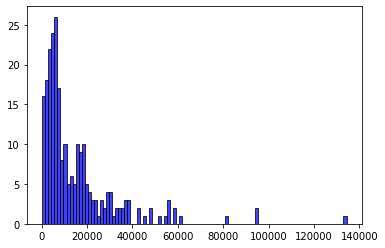

In [17]:
mask_paths = glob.glob("gaze-image-dataset/*/ground_truth/*")
gaze_paths = glob.glob("gaze-image-dataset/gaze_images/*")

mask_id_to_mask_path = { f.split("\\")[-1].replace(".jpg", "") : f for f in mask_paths }

disease_size_list = []
for mask_path in mask_paths:
    mask = cv2.imread(mask_path, cv2.COLOR_BGR2GRAY) / 255
    if mask.max() > 0:
        disease_size_list.append(mask.sum())

disease_size_list = np.array(disease_size_list)

print(f"Positive cases: {len(disease_size_list)}")
print(f"Negative cases: {len(mask_paths) - len(disease_size_list)}")

print("Histogram of size of disease")
plt.hist(disease_size_list, bins=100, alpha=0.75, color='blue', edgecolor='black')
plt.show()

In [18]:
# Dice Coefficient
def dice_coefficient(A, B):
    intersection = np.sum(A * B)
    return 2 * intersection / (np.sum(A) + np.sum(B))

# Intersection over Union (IoU)
def iou(A, B):
    intersection = np.sum(A * B)
    union = np.sum(A) + np.sum(B) - intersection
    return intersection / union

# How much of the mask is gaze covering
def intersection_over_mask(A, B):
    intersection = np.sum(A * B)
    return intersection / np.sum(A)

def heatmap_spread(A):
    return np.sum(A / A.size)

def abnormality_focus(A, B):
    return ((A*B).sum() / A.sum())

In [19]:
def print_overlap_statistics(gaze_paths, mask_id_to_mask_path=None):
    # for positive cases, we compute similarity metrics between mask and gaze
    # for negative cases, we compute size and spread of gaze

    dice_scores = []
    iou_scores = []
    intersection_over_mask_scores = []
    heatmap_spread_scores_positives = []
    heatmap_spread_scores_negatives = []
    abnormality_focus_times = []
    for gaze_path in gaze_paths:
        if mask_id_to_mask_path is not None:
            mask = cv2.imread(mask_id_to_mask_path[gaze_path.split("\\")[-1].replace(".jpg", "")], cv2.COLOR_BGR2GRAY).astype(np.float64) / 255
        else:
            mask = cv2.imread(gaze_path.replace("\gaze", "\ground_truth"), cv2.COLOR_BGR2GRAY).astype(np.float64) / 255
        gaze = cv2.imread(gaze_path, cv2.COLOR_BGR2GRAY).astype(np.float64)
        gaze_normalised = gaze / np.max(gaze)
        if mask.max() > 0:
            dice_scores.append(dice_coefficient(mask, gaze_normalised))
            iou_scores.append(iou(mask, gaze_normalised))
            intersection_over_mask_scores.append(intersection_over_mask(mask, gaze_normalised))
            heatmap_spread_scores_positives.append(heatmap_spread(gaze))
            abnormality_focus_times.append(abnormality_focus(gaze, mask))
        else:
            heatmap_spread_scores_negatives.append(heatmap_spread(gaze))

    print(f"Mean dice score between mask and gaze: {np.array(dice_scores).mean()}")
    print(f"Mean iou score between mask and gaze: {np.array(iou_scores).mean()}")
    print(f"Mean intersection over mask score between mask and gaze: {np.array(intersection_over_mask_scores).mean()}")
    print(f"Mean heatmap spread score in positive cases: {np.array(heatmap_spread_scores_positives).mean()}")
    print(f"Mean heatmap spread score in negative cases: {np.array(heatmap_spread_scores_negatives).mean()}")
    print(f"Mean time spent on abnormality in positive cases: {np.array(abnormality_focus_times).mean()}")

In [20]:
print_overlap_statistics(gaze_paths, mask_id_to_mask_path)

Mean dice score between mask and gaze: 0.11528009229090119
Mean iou score between mask and gaze: 0.0639190082612748
Mean intersection over mask score between mask and gaze: 0.4378861633752245
Mean heatmap spread score in positive cases: 1.10467302275867
Mean heatmap spread score in negative cases: 0.7536436891427948
Mean time spent on abnormality in positive cases: 0.07672304508345275


**TUFTS Dental Dataset Analysis**

Positive cases: 339
Negative cases: 661
Histogram of size of disease


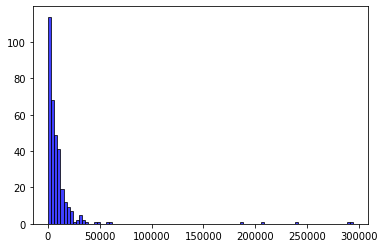

In [21]:
mask_paths = glob.glob("gaze-dental-dataset/*/ground_truth/*")
gaze_paths = glob.glob("gaze-dental-dataset/*/gaze/*")

# mask_id_to_mask_path = { f.split("\\")[-1].replace(".jpg", "") : f for f in mask_paths }

disease_size_list = []
for mask_path in mask_paths:
    mask = cv2.imread(mask_path, cv2.COLOR_BGR2GRAY) / 255
    if mask.max() > 0:
        disease_size_list.append(mask.sum())

disease_size_list = np.array(disease_size_list)

print(f"Positive cases: {len(disease_size_list)}")
print(f"Negative cases: {len(mask_paths) - len(disease_size_list)}")

print("Histogram of size of disease")
plt.hist(disease_size_list, bins=100, alpha=0.75, color='blue', edgecolor='black')
plt.show()

In [22]:
print_overlap_statistics(gaze_paths)

Mean dice score between mask and gaze: 0.09828548992497785
Mean iou score between mask and gaze: 0.05383274755188333
Mean intersection over mask score between mask and gaze: 0.4750650190500438
Mean heatmap spread score in positive cases: 10.083748835040925
Mean heatmap spread score in negative cases: 12.527360235598339
Mean time spent on abnormality in positive cases: 0.06583304717934728


In [3]:
import numpy as np
import glob 
import matplotlib.pyplot as plt
import cv2

image_paths = glob.glob("gaze-image-dataset/*/images/*")
len(list(set(image_paths)))

1142

In [217]:
def visualise(img, mask, gaze):
    fig, ax = plt.subplots()
    for point in gaze:
        point = list(point)
        center = point[:2][::-1]
        radius = point[-1]*20
        color = (0, 0, 255)  # Red color
        thickness = -1  # Filled circle
        cv2.circle(img, center, radius, color, thickness)
    
    ax.imshow(img)
    
    ax.imshow(mask, alpha=0.5, zorder=1)

    ax.axis('off')
    plt.show()

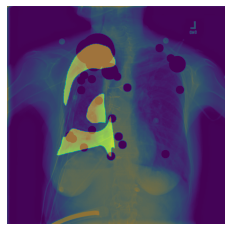

In [324]:
index = np.random.randint(len(image_paths))
img = cv2.imread(image_paths[index], cv2.COLOR_BGR2GRAY).astype(np.float64) / 255
mask = cv2.imread(image_paths[index].replace("images", "ground_truth"), cv2.COLOR_BGR2GRAY).astype(np.float64) / 255
gaze = np.load(image_paths[index].replace("images", "gaze").replace("jpg", "npy"))
gaze_seq = [(int(g[0]), int(g[1]), int(g[2])) for g in gaze]
visualise(img, mask, gaze_seq)